In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from camera import PhotoReceptor

# Grabbing one frame and exiting

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 4, dim1 : 576.0, dim2 : 1024.0


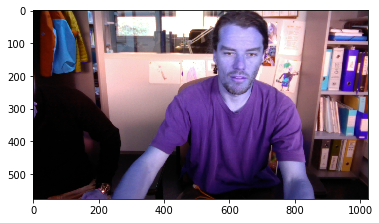

In [3]:
Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE=4)

#Ph.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640.)
#Ph.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)
#print(Ph.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), Ph.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#frame = Ph.grab()
frame = Ph.grab()
Ph.close()

plt.imshow(frame)

# Benchmarking camera for different sizes

In [4]:
downscales = 2.**np.arange(5)
downscales = (4/3)**np.arange(5)
downscales = np.hstack(( 1+ 1/np.arange(1,5) , 1))
downscales = np.arange(1, 20) # 
print(downscales)

[ 2.    1.5   1.33  1.25  1.  ]


In [5]:
'''  Version a : Run the program and calculate the framerate (limit = number of frames recorded) '''

num_frames = 50
sizes_a, frames_a = [], []
for ds in downscales:
    
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    frame = Ph.grab()

    time.sleep(1)
    start = time.time()

    for i in range(num_frames):
        frame = Ph.grab()

    seconds = time.time() - start
        
    sizes_a.append(Ph.h*Ph.w)
    Ph.close()

    fps = num_frames / seconds
    frames_a.append(fps)
    print ('Frame rate %s : \n' % fps)

Before a downscale of 2.0, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 2.0, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.870526279956135 : 

Before a downscale of 1.5, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.5, dim1 : 576.0, dim2 : 1024.0
Frame rate 30.106621684671428 : 

Before a downscale of 1.3333333333333333, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.3333333333333333, dim1 : 576.0, dim2 : 1024.0
Frame rate 29.892257411694878 : 

Before a downscale of 1.25, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.25, dim1 : 576.0, dim2 : 1024.0
Frame rate 30.118559716236806 : 

Before a downscale of 1.0, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.0, dim1 : 720.0, dim2 : 1280.0
Frame rate 30.048127966804742 : 



In [6]:
''' Version b : Run the program and calculate the framerate (limit = time recorded) '''

sizes_b, frames_b = [], []
for ds in downscales:
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    Rec = True
    nb_frames = 0

    start = time.time()

    while(Rec == True):

        frame = Ph.grab()
        nb_frames += 1
        
        seconds = time.time() - start
        
        if seconds >= 10 :
            Rec = False
    sizes_b.append(Ph.h*Ph.w)
           
    Ph.close()

    fps = nb_frames / seconds
    frames_b.append(fps)
    print ('Frame rate : %s \n' % fps)

Before a downscale of 2.0, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 2.0, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.041931736713437 

Before a downscale of 1.5, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.5, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.057393114385228 

Before a downscale of 1.3333333333333333, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.3333333333333333, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.040025289589764 

Before a downscale of 1.25, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.25, dim1 : 576.0, dim2 : 1024.0
Frame rate : 30.030419534892086 

Before a downscale of 1.0, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 1.0, dim1 : 720.0, dim2 : 1280.0
Frame rate : 30.002138885951354 



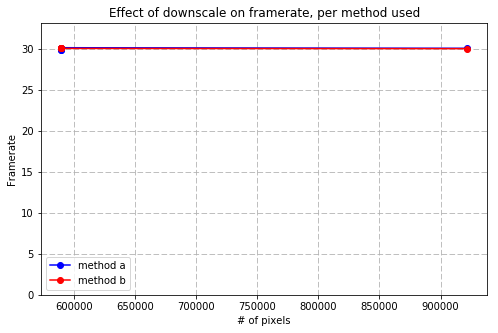

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(sizes_a, frames_a, 'b', marker='o', label='method a')
ax.plot(sizes_b, frames_b, 'r', marker='o', label='method b')
ax.grid(linestyle='--')
plt.legend()
ax.set_title('Effect of downscale on framerate, per method used')
ax.set_xlabel('# of pixels')
ax.set_ylabel('Framerate')
ax.set_ylim(0, 1.1*max(max(frames_a), max(frames_b)))
plt.show()